# Introduction to PySPEDAS

**By Jim Lewis, Berkeley Space Sciences Lab - jwl@ssl.berkeley.edu**

- PySPEDAS: https://pyspedas.readthedocs.io/
- PyTplot: https://pyspedas.readthedocs.io/en/matplotlib-backend/


A little history: 
- `tplot` started as an IDL project in 1995, by Davin Larson, and is the core of SPEDAS (and now PySPEDAS)
- in 2017, some developers on the MAVEN team created an initial Python version, using Qt as a back-end for creating figures
- in late 2021, development began on a `matplotlib` version, which is what we're using in this notebook


In [1]:
# The following lines were needed for the summer school heliocloud environment
# import os
# os.environ["SPEDAS_DATA_DIR"] = "/home/jovyan/scratch_space/pyspedas_data"

# This line is necessary if you don't have pyspedas installed yet (e.g. Google Colab)
# You can comment these out if you already have a working pyspedas installation
# sunpy is needed for some MMS operations, and is not installed in the default pyspedas install

!pip install pyspedas
!pip install sunpy

  Obtaining dependency information for matplotlib==3.6.2 from https://files.pythonhosted.org/packages/ef/0b/1c4dd0f4237d9b9dd3faa697b3ff9522a2c45254de268c058f23f025372b/matplotlib-3.6.2-cp39-cp39-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 2.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.9.0
    Uninstalling matplotlib-3.9.0:
      Successfully uninstalled matplotlib-3.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
solarmach 0.3.4 requires matplotlib==3.5.3, but you have matplotlib 3.6.2 which is incompatible.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


We have preloaded the data we'll be using with PySPEDAS during PyHC Summer School, to avoid overloading the various data servers we would otherwise need to contact.  We'll set the SPEDAS_DATA_DIR environment variable to the data cache directory.

In [1]:
# These lines were needed for the summer school heliocloud environment
# import os
# os.environ["SPEDAS_DATA_DIR"] = "/home/jovyan/scratch_space/pyspedas_data"

# This line is needed if you don't already have pyspedas installed (e.g. google colab)
# You can comment it out if you already have a working install of pyspedas

!pip install pyspedas



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


### Example 1: A minimal PySPEDAS example ###

We'll import the top level pyspedas and pyspedas modules.  We'll also import a few frequently-used tools (like tplot) to avoid repetition.

In [1]:
import pyspedas
import pyspedas
from pyspedas import tplot

20-May-24 22:25:18: /Users/jwl/PycharmProjects/summer-school-24/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



We'll set a time range corresponding to the date of the event we're studying.

In [2]:
trange = ['2023-03-24', '2023-03-25']

Now we'll load some THEMIS-A Fluxgate Magnetometer (FGM) data and plot it.

20-May-24 22:25:32: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/tha/l2/fgm/2023/
20-May-24 22:25:32: File is current: themis_data/tha/l2/fgm/2023/tha_l2_fgm_20230324_v01.cdf


['tha_fgs_btotal', 'tha_fgs_gse', 'tha_fgs_gsm', 'tha_fgs_dsl', 'tha_fgl_btotal', 'tha_fgl_gse', 'tha_fgl_gsm', 'tha_fgl_dsl', 'tha_fgl_ssl', 'tha_fgh_btotal', 'tha_fgh_gse', 'tha_fgh_gsm', 'tha_fgh_dsl', 'tha_fgh_ssl', 'tha_fge_btotal', 'tha_fge_gse', 'tha_fge_gsm', 'tha_fge_dsl', 'tha_fge_ssl']


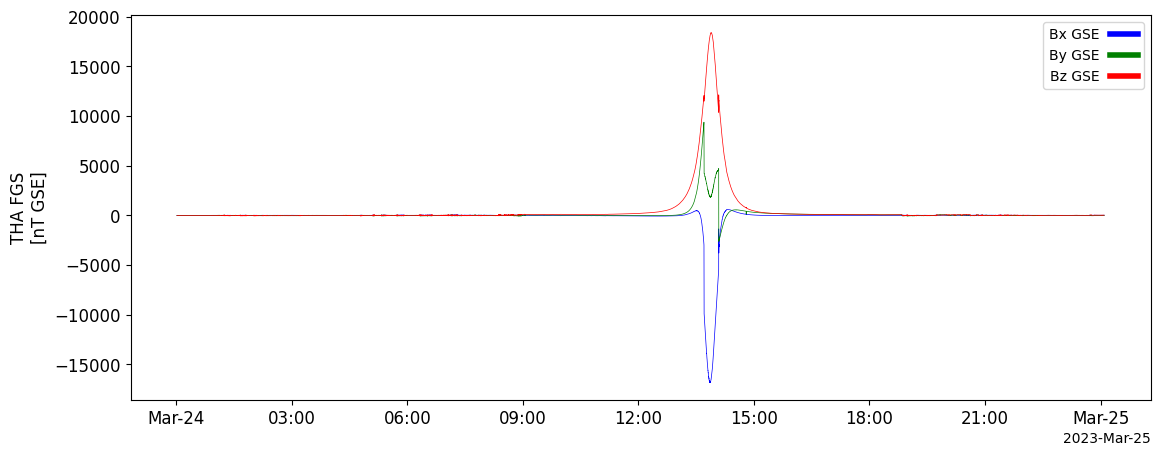

In [3]:
fgm_vars = pyspedas.themis.fgm(probe='a',trange=trange)
print(fgm_vars)
tplot('tha_fgs_gse')

A few things to note about this example:

Many of the PySPEDAS load routines follow the naming convention pyspedas.mission.instrument.

Parameters to the load routines are fairly standardized, and usually have sensible defaults.
In this case, we got all the relevant variables (including several choices of time resolution and coordinate systems) from the THEMIS-A L2 FGM data set.

Most load routines return a list of the tplot variables loaded.

We didn't have to set any axis titles, tick mark spacing, data ranges, or legends for the plot!
Many of the plot options are taken from metadata in the underlying data files; other attributes are initialized with reasonable defaults.

Tplot variables are the main data structure in PySPEDAS.  A tplot variable is essentially a container for timestamps, data arrays, and metadata (including plot options).  The underlying data structures are mapped to strings, and it is actually the strings or lists of strings that are passed around between PySPEDAS tools.

Let's take a closer look at some of the tplot variables produced by this load routine call.

We can see a list of loaded variables with the routine pyspedas.tplot_names():

In [4]:
pyspedas.tplot_names()

0 : tha_fgs_btotal
1 : tha_fgs_gse
2 : tha_fgs_gsm
3 : tha_fgs_dsl
4 : tha_fgl_btotal
5 : tha_fgl_gse
6 : tha_fgl_gsm
7 : tha_fgl_dsl
8 : tha_fgl_ssl
9 : tha_fgh_btotal
10 : tha_fgh_gse
11 : tha_fgh_gsm
12 : tha_fgh_dsl
13 : tha_fgh_ssl
14 : tha_fge_btotal
15 : tha_fge_gse
16 : tha_fge_gsm
17 : tha_fge_dsl
18 : tha_fge_ssl


['tha_fgs_btotal',
 'tha_fgs_gse',
 'tha_fgs_gsm',
 'tha_fgs_dsl',
 'tha_fgl_btotal',
 'tha_fgl_gse',
 'tha_fgl_gsm',
 'tha_fgl_dsl',
 'tha_fgl_ssl',
 'tha_fgh_btotal',
 'tha_fgh_gse',
 'tha_fgh_gsm',
 'tha_fgh_dsl',
 'tha_fgh_ssl',
 'tha_fge_btotal',
 'tha_fge_gse',
 'tha_fge_gsm',
 'tha_fge_dsl',
 'tha_fge_ssl']

To get access to the underlying timestamp or data arrays, or the metadata dictionary, 
we can use pyspedas.get_data().

pyspedas.time_string() is useful for generating human-readable timestamps.

In [5]:
from pyspedas import get_data, time_string

# By default, get_data returns a tuple with named fields 'times', 'y', 
# and possibly additional fields for spectrograms or higher dimensional data arrays.
fgs_dat = get_data('tha_fgs_gse')
print(time_string(fgs_dat.times[0:3]))
print(fgs_dat.y[0:3])

# get_data can also return a dictionary containing the variable's metadata, plot options, etc.
fgs_md = get_data('tha_fgs_gse', metadata=True)
print(fgs_md.keys())
print(fgs_md['plot_options']['yaxis_opt'])

['2023-03-24 00:01:04.462111', '2023-03-24 00:01:07.203537', '2023-03-24 00:01:09.944960']
[[ -9.648484 -12.33979  -12.768709]
 [ -9.629018 -12.026798 -12.91995 ]
 [-10.109423 -11.871632 -13.101343]]
dict_keys(['CDF', 'data_att', 'plot_options'])
{'axis_label': 'THA FGS', 'crosshair': 'Y', 'y_axis_type': 'linear', 'y_range': [-16843.938, 18382.479], 'axis_subtitle': '[nT GSE]', 'legend_names': ['Bx GSE', 'By GSE', 'Bz GSE']}


In [7]:
print(fgs_md['CDF']['VATT'])


{'CATDESC': 'FGS (spin-resolution/~3 sec) magnetic  field B in XYZ GSE Coordinates', 'DISPLAY_TYPE': 'time_series', 'FIELDNAM': 'BXYZ GSE Coordinate, nT units', 'FILLVAL': -1e+30, 'FORMAT': 'E13.6', 'DEPEND_TIME': 'tha_fgs_time', 'DEPEND_EPOCH0': 'tha_fgs_epoch0', 'DEPEND_0': 'tha_fgs_epoch', 'VALIDMIN': array([-25000., -25000., -25000.], dtype=float32), 'VALIDMAX': array([25000., 25000., 25000.], dtype=float32), 'VAR_TYPE': 'data', 'TENSOR_ORDER': '1', 'PROPERTY': 'vector', 'SC_ID': 'a', 'UNITS': 'nT GSE', 'VAR_NOTES': 'Units are in nanotesla', 'AVG_TYPE': 'standard', 'CALIB_SOFTWARE': 'fgm_calibrate, thm_cal_fgm, thm_cal_fit', 'CALIB_INPUT': 'tha_fgmcal.txt', 'SCALE_TYP': 'linear', 'DICT_KEY': 'magnetic_field>vector_GSE', 'SI_CONVERSION': '1e-9>T', 'LABL_PTR_1': 'tha_fgs_labl', 'DEPEND_1': 'tha_fgs_compno', 'COORDINATE_SYSTEM': 'GSE>Geocentric Solar Ecliptic', 'REPRESENTATION_1': 'Rep_xyz'}


To find the supported load routines and keywords, see our documentation: https://pyspedas.readthedocs.io/

You can also see the supported options by calling `help` on the load routine you're interested in

In [9]:
help(pyspedas.themis.fgm)

Help on function fgm in module pyspedas.themis.spacecraft.fields.fgm:

fgm(trange=['2007-03-23', '2007-03-24'], probe='c', level='l2', suffix='', get_support_data=False, varformat=None, coord=None, varnames=[], downloadonly=False, notplot=False, no_update=False, time_clip=False)
    This function loads Fluxgate magnetometer (FGM) data
    
    Parameters
    ----------
        trange : list of str
            time range of interest [starttime, endtime] with the format
            'YYYY-MM-DD','YYYY-MM-DD'] or to specify more or less than a day
            ['YYYY-MM-DD/hh:mm:ss','YYYY-MM-DD/hh:mm:ss']
            Default: ['2007-03-23', '2007-03-24']
    
        probe: str or list of str
            Spacecraft probe letter(s) ('a', 'b', 'c', 'd' and/or 'e')
            Default: 'c'
    
        level: str
            Data level; Valid options: 'l1', 'l2'
            Default: 'l2'
    
        suffix: str
            The tplot variable names will be given this suffix.
            Defaul

# THEMIS ESA (Electrostatic Analyzer) data

Now we'll load some THEMIS-A data from the ESA instrument.   This is a good example of a spectrogram plot.

20-May-24 22:43:40: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/tha/l2/esa/2023/
20-May-24 22:43:40: File is current: themis_data/tha/l2/esa/2023/tha_l2_esa_20230324_v01.cdf
20-May-24 22:43:40: Variable tha_peer_symm_angQ not marked as VIRTUAL, but has FUNCT and COMPONENT_0 attributes; skipping
20-May-24 22:43:40: Variable tha_peer_magfQ not marked as VIRTUAL, but has FUNCT and COMPONENT_0 attributes; skipping
20-May-24 22:43:40: Variable tha_peer_velocity_dslQ not marked as VIRTUAL, but has FUNCT and COMPONENT_0 attributes; skipping
20-May-24 22:43:40: Variable tha_peer_velocity_gseQ not marked as VIRTUAL, but has FUNCT and COMPONENT_0 attributes; skipping
20-May-24 22:43:40: Variable tha_peer_velocity_gsmQ not marked as VIRTUAL, but has FUNCT and COMPONENT_0 attributes; skipping
20-May-24 22:43:40: Variable tha_peer_modeQ not marked as VIRTUAL, but has FUNCT and COMPONENT_0 attributes; skipping


['tha_peif_data_quality', 'tha_peef_data_quality', 'tha_peir_data_quality', 'tha_peer_data_quality', 'tha_peib_data_quality', 'tha_peeb_data_quality', 'tha_peif_density', 'tha_peif_avgtemp', 'tha_peif_vthermal', 'tha_peif_sc_pot', 'tha_peif_en_eflux', 'tha_peif_t3', 'tha_peif_magt3', 'tha_peif_ptens', 'tha_peif_mftens', 'tha_peif_flux', 'tha_peif_symm', 'tha_peif_symm_ang', 'tha_peif_magf', 'tha_peif_velocity_dsl', 'tha_peif_velocity_gse', 'tha_peif_velocity_gsm', 'tha_peef_density', 'tha_peef_avgtemp', 'tha_peef_vthermal', 'tha_peef_sc_pot', 'tha_peef_en_eflux', 'tha_peef_t3', 'tha_peef_magt3', 'tha_peef_ptens', 'tha_peef_mftens', 'tha_peef_flux', 'tha_peef_symm', 'tha_peef_symm_ang', 'tha_peef_magf', 'tha_peef_velocity_dsl', 'tha_peef_velocity_gse', 'tha_peef_velocity_gsm', 'tha_peir_density', 'tha_peir_avgtemp', 'tha_peir_vthermal', 'tha_peir_sc_pot', 'tha_peir_en_eflux', 'tha_peir_t3', 'tha_peir_magt3', 'tha_peir_ptens', 'tha_peir_mftens', 'tha_peir_flux', 'tha_peir_symm', 'tha_pei

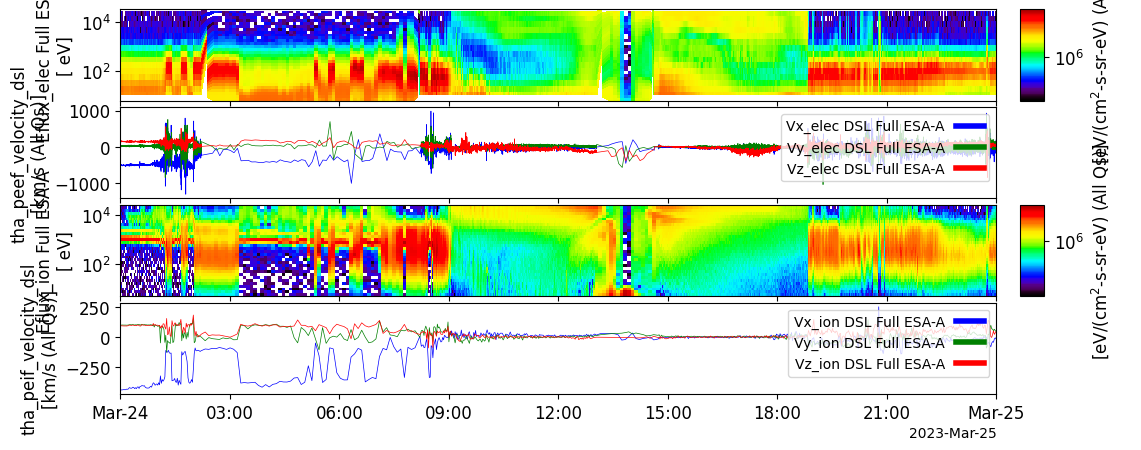

In [10]:
esa_vars = pyspedas.themis.esa(probe='a', trange=trange)
print(esa_vars)

# PEEF = ESA fast survey electrons, PEIF = ESA fast survey ions
tplot(['tha_peef_en_eflux','tha_peef_velocity_dsl','tha_peif_en_eflux', 'tha_peif_velocity_dsl'])

Let's take a look at one of the spectrogram variables, 'tha_peif_en_eflux'.

In [11]:
import numpy as np
esa_eflux_data = get_data('tha_peif_en_eflux')
print("Timestamps:")
print(pyspedas.time_string(esa_eflux_data.times[0:3]))
print("First data value(s):")
print(esa_eflux_data.y[0,:])
print("First v values(s):")
print(esa_eflux_data.v[0,:])
print("Shape of times array:",np.shape(esa_eflux_data.times))
print("Shape of data values array:", np.shape(esa_eflux_data.y))
print("Shape of v (bin values) array:",np.shape(esa_eflux_data.v))


Timestamps:
['2023-03-24 00:00:03.061822', '2023-03-24 00:01:30.787401', '2023-03-24 00:02:58.512975']
First data value(s):
[           nan 6.15290332e+03 5.73440137e+03 2.56426440e+03
 5.18128906e+03 1.33006091e+03 5.41965283e+03 1.34188008e+04
 9.80961484e+04 4.04959850e+06 2.12209656e+05 1.55885430e+07
 4.39665000e+07 5.05284375e+05 1.42198467e+04 6.87176562e+03
 3.87914087e+03 4.48261426e+03 2.50773999e+03 1.25872205e+03
 2.34443140e+03 0.00000000e+00 1.82727820e+03 0.00000000e+00
 2.18389990e+03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.25864404e+03 0.00000000e+00 5.92535706e+02 0.00000000e+00]
First v values(s):
[2.5213438e+04 2.1296297e+04 1.6178354e+04 1.2290454e+04 9.3367285e+03
 7.0928662e+03 5.3884238e+03 4.0933552e+03 3.1095496e+03 2.3627498e+03
 1.7944740e+03 1.3631693e+03 1.0353623e+03 7.8719855e+02 5.9751678e+02
 4.5362027e+02 3.4512076e+02 2.6201477e+02 1.9930051e+02 1.5120676e+02
 1.1504025e+02 8.7723000e+01 6.6561752e+01 5.0402252e+01 3.8475002e+01
 2.9241001e+0

There are 746 timestamps.  Each data point has 32 energy bins, with the bin values (in eV) along the Y axis. 
 
The data values in each energy bin are mapped to colors (what we call the "z-axis" for a spectogram variable).  

The tuple returned by get_data for this variable has an extra component, 'v', representing the bin values along the Y axis. Note that v also has shape 746 x 32.  The bin values are allowed to vary over time, and PySPEDAS will render them correctly as long as the metadata in the underlying data file follows the standard conventions.

# Orbit data for the ERG (Arase) satellite

Let's look at a different mission, JAXA's Arase probe.   We'll load and plot the orbit data
for the time range of interest.

20-May-24 22:47:44: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2023/
20-May-24 22:47:47: File is current: erg_data/satellite/erg/orb/def/2023/erg_orb_l2_20230324_v04.cdf


 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data']

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


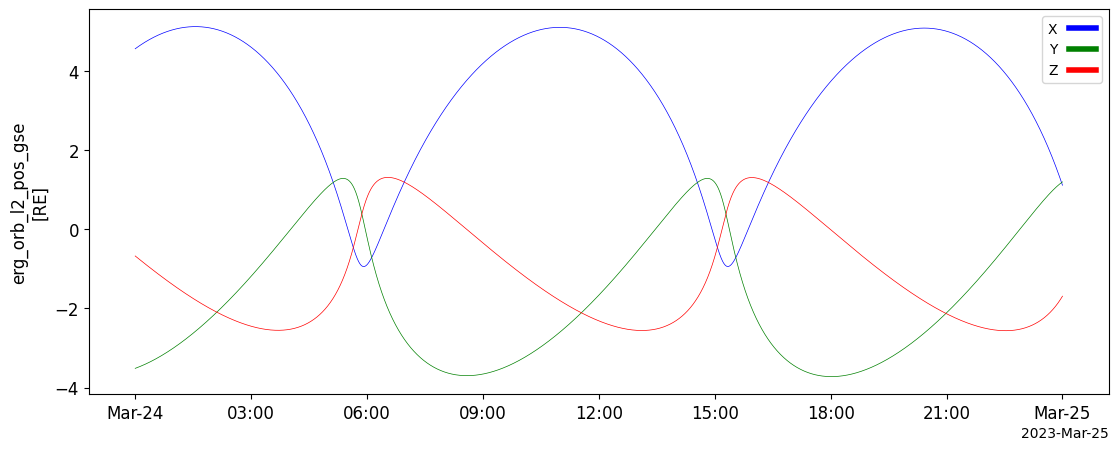

In [12]:
erg_orb_vars = pyspedas.erg.orb(trange=trange)
tplot('erg_orb_l2_pos_gse')

In [13]:
erg_orb_vars


['erg_orb_l2_pos_llr',
 'erg_orb_l2_pos_gse',
 'erg_orb_l2_pos_gsm',
 'erg_orb_l2_pos_sm',
 'erg_orb_l2_pos_rmlatmlt',
 'erg_orb_l2_pos_eq',
 'erg_orb_l2_pos_iono_north',
 'erg_orb_l2_pos_iono_south',
 'erg_orb_l2_pos_blocal',
 'erg_orb_l2_pos_blocal_mag',
 'erg_orb_l2_pos_beq',
 'erg_orb_l2_pos_beq_mag',
 'erg_orb_l2_pos_Lm',
 'erg_orb_l2_vel_gse',
 'erg_orb_l2_vel_gsm',
 'erg_orb_l2_vel_sm',
 'erg_orb_l2_spn_num',
 'erg_orb_l2_man_prep_flag',
 'erg_orb_l2_man_on_flag',
 'erg_orb_l2_eclipse_flag']

# OMNIWeb Solar Wind parameters

The OMNIWeb data set includes various solar wind and interplanetary magnetic field measurements that are especially useful as inputs to models of Earth's magnetic field, and as geomagnetic activity indexes.   Here we'll load some OMNI data for the date we're studying, and plot the proton density, flow speed, and dynamic pressure.

20-May-24 22:49:03: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_1min/2023/
20-May-24 22:49:03: File is current: omni_data/hro2_1min/2023/omni_hro2_1min_20230301_v01.cdf


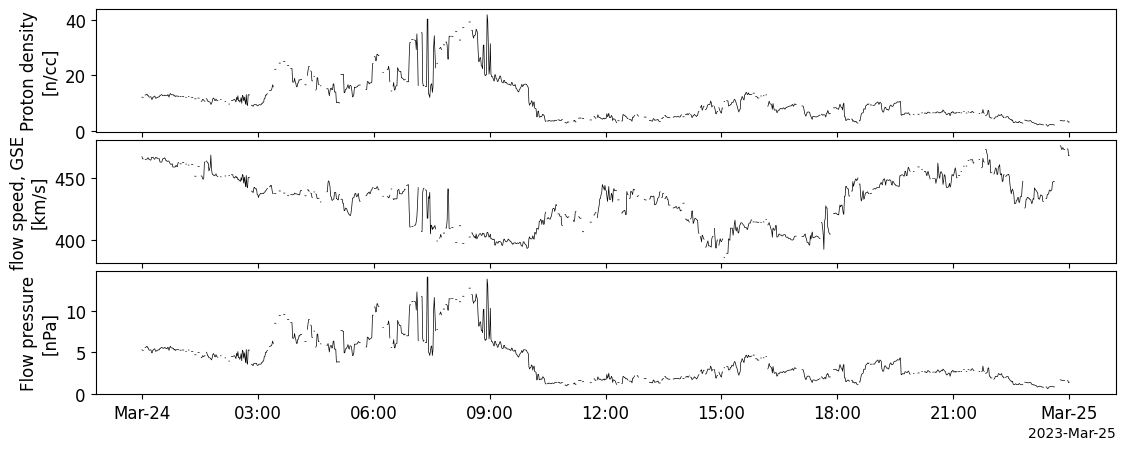

In [14]:
pyspedas.omni.data(trange=trange)
tplot(['proton_density', 'flow_speed', 'Pressure'])

# Ground Magnetometer Data #

PySPEDAS can load magnetometer data from several networks of ground stations in North America, Europe, Antarctica, and other locations.  Most of them can be accessed via the THEMIS GMAG load routine.   

20-May-24 22:49:17: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/fsmi/2023/
20-May-24 22:49:17: File is current: themis_data/thg/l2/mag/fsmi/2023/thg_l2_mag_fsmi_20230324_v01.cdf
20-May-24 22:49:17: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/fykn/2023/
20-May-24 22:49:18: File is current: themis_data/thg/l2/mag/fykn/2023/thg_l2_mag_fykn_20230324_v01.cdf
20-May-24 22:49:18: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/atha/2023/
20-May-24 22:49:18: File is current: themis_data/thg/l2/mag/atha/2023/thg_l2_mag_atha_20230324_v01.cdf


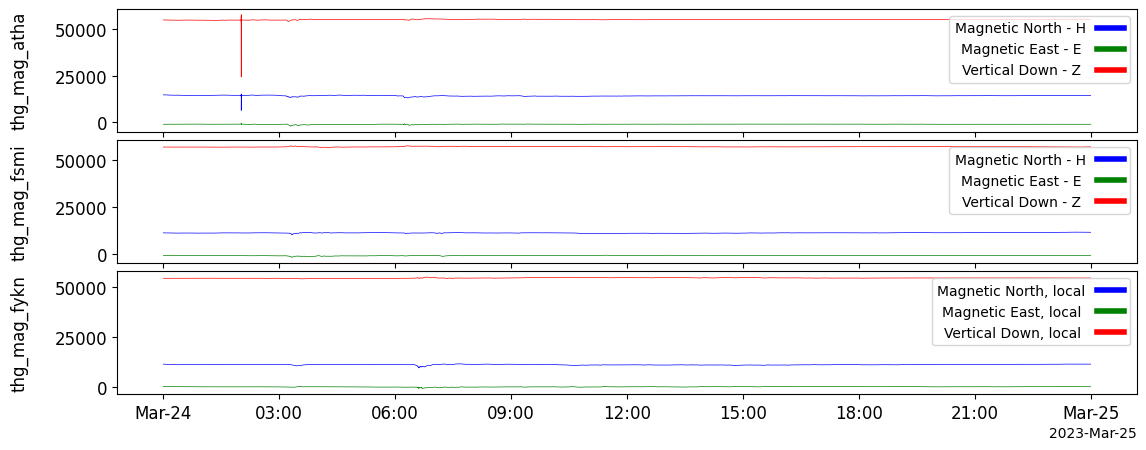

In [15]:
gmag_vars = pyspedas.themis.gmag(sites=['fsmi', 'fykn', 'atha'], trange=trange)
tplot(gmag_vars)

Let's take a closer look at the FSMI data (Fort Smith, Northwest Territories, Canada).
The strength of the ambient field makes it hard to see small variations.  PyTplot has a "subtract_median" tool that will help visualize the variations.

20-May-24 22:49:22: Subtract Median was applied to: thg_mag_fsmi_subtract_median


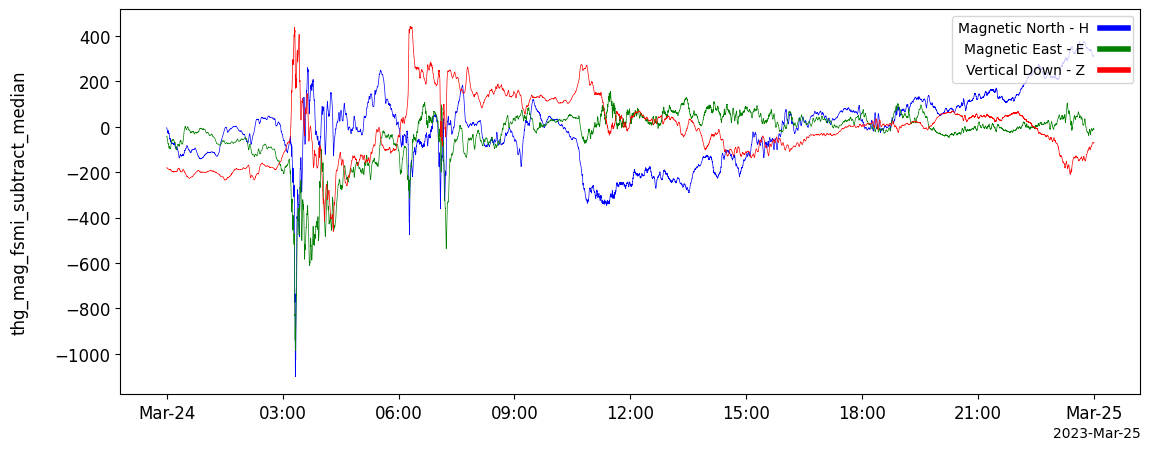

In [16]:
pyspedas.subtract_median('thg_mag_fsmi',newname='thg_mag_fsmi_subtract_median')
tplot('thg_mag_fsmi_subtract_median')